In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_blobs


In [5]:
def initialize_parameters(layers_dims):
    # The input is an array of numbers indicating how many nodes are in each layer
    
    parameters = {}
    
    for l in range(1,len(layers_dim)):
        parameters["W" + str(l)] = np.random.randn(layers_dims[l],layers_dim[l-1] )*0.01
        parameters["b" + str(l)] = np.zeros((layers_dims[l],1))
    
    # This pulls numbers with a normal distribution with a variance of 100^2 and a mean of 0
    # Saves the parameters
    
    return parameters

def linear_activation_forward(A_prev, W,b,activation):
    
    if activation == "sigmoid":
        
        Z = np.dot(W,A_prev) + b
        linear_cache = (A_prev,W,b)
        A = 1/(1+np.exp(-Z))
        activation_cache = (Z)
        
    elif activation == "relu":
        
        Z = np.dot(W,A_prev) + b
        cache = (A_prev,W,b)
        A = np.maximum(Z,0)
        activation_cache = (Z)

    cache = (linear_cache, activation_cache)
    return A, cache



def L_model_forward(X,parameters):
    """
    Forward propagation for a neural network architecture like:
        [LINEAR --> RELU]*(L-1) -> LINEAR -> SIGMOID
    """
    caches = []
    A = X
    L = len(parameters) // 2
    
    for l in range(1,L):
        A_prev = A
        A, cache = linear_activation_forward(A_prev,parameters['W' + str(l)], parameters['b'+str(l)], "relu")
        caches.append(cache)
        
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], "sigmoid")
    caches.append(cache)
    return AL, caches

def compute_cost(AL, Y):
    
    m = Y.shape[1]
    cost = (-1/m)* np.sum(np.dot(Y,np.log(AL).T)+np.dot((1-Y),np.log(1-AL).T))
    cost = np.squeeze(cost) 
    
    return cost
    

def linear_backward(dZ, cache):
    
    A_prev, W, b = cache
    m = A_prev.shape[1]
    
    dW = (1/m)*np.dot(dZ,cache[0].T)
    db = (1/m)*np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(cache[1].T,dZ)
    
    return dA_prev, dW, db

def relu_backward(dA,cache):
    Z = cache[1]
    dZ = np.array(dA, copy=True)
    dZ[Z <= 0 ] = 0
    
    return dZ

def sigmoid_backward(dA, cache):
    Z = cache[1]
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    return dZ

def linear_activation_backward(dA,cache, activation):
    
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA,activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    if activation == "sigmoid":
        dZ = sigmoid_backward(dA,activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev,dW,db

def L_model_backward(AL, Y, caches):
    grad = {}
    L = len(caches)
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)
    
    dA = -(np.divide(Y,AL) - np.divide(1- y , 1-AL))
    
    current_cache = caches[L-1]
    dA_prev_temp, dW_temp, db_temp = linear_activation_backward(dAL, current_cache, "sigmoid")
    grads["dA" + str(L-1)] = dA_prev_temp
    grads["dW" + str(L)] = dW_temp
    grads["db" + str(L)] = db_temp
    
    for l in reversed(range(L-1)):
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA"+str(l+1)], caches[l], "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l+1)] = dW_temp
        grads["db" + str(l+1)] = db_temp
    return grads


def update_parameters(params, grads, learning_rate):
    
    parameters = params.copy()
    L = len(parameters) // 2
    
    for l in range(L):
        parameters["W" + str(l+1)] = params["W"+str(l+1)] - learning_rate*grads["dW"+str(l+1)]
        parameters["b" + str(l+1)] = params["b"+str(l+1)] - learning_rate*grads["db"+str(l+1)]
        
    return parameters

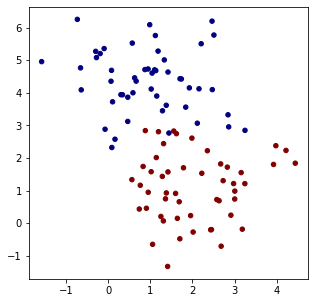

In [6]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=0)




plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

In [7]:
print(X)
print(y)

[[ 4.21850347  2.23419161]
 [ 0.90779887  0.45984362]
 [-0.27652528  5.08127768]
 [ 0.08848433  2.32299086]
 [ 3.24329731  1.21460627]
 [ 1.44193252  2.76754364]
 [ 1.0220286   4.11660348]
 [ 3.97820955  2.37817845]
 [ 0.58894326  4.00148458]
 [ 1.25185786  0.20811388]
 [ 0.62835793  4.4601363 ]
 [ 1.68608568  0.65828448]
 [ 1.18454506  5.28042636]
 [ 0.06897171  4.35573272]
 [ 1.78726415  1.70012006]
 [ 4.4384123   1.84214315]
 [ 3.18190344 -0.18226785]
 [ 0.30380963  3.94423417]
 [ 0.73936011  0.43607906]
 [ 1.28535145  1.43691285]
 [ 1.1312175   4.68194985]
 [ 0.66471755  4.35995267]
 [ 1.31570453  2.44067826]
 [-0.18887976  5.20461381]
 [ 2.57854418  0.72611733]
 [ 0.87305123  4.71438583]
 [ 1.3105127   0.07122512]
 [ 0.9867701   6.08965782]
 [ 1.42013331  4.63746165]
 [ 2.3535057   2.22404956]
 [ 2.43169305 -0.20173713]
 [ 1.0427873   4.60625923]
 [ 0.95088418  0.94982874]
 [ 2.45127423 -0.19539785]
 [ 1.62011397  2.74692739]
 [ 2.15504965  4.12386249]
 [ 1.38093486  0.92949422]
 